<h2 style='color:blue'align='center'>DISCHARGE TIME PREDICTION</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
np.random.seed(40)

C:\Users\siva\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data=pd.read_csv('ntrvyadaya.csv')

In [3]:
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,DAYS
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-06-13 0:00,09-07-13,NO,NaN,D,31
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-08-13 0:00,09-09-13,NO,NaN,D,32
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15-08-13 0:00,18-10-13 0:00,NO,NaN,D,64
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24-08-13 0:00,27-09-13 0:00,NO,NaN,D,34
4,9,56,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,...,Karumuri Hospital,C,GUNTUR,Guntur,14-06-14 0:00,16-06-14,NO,NaN,D,2


In [4]:
data_cat=data.select_dtypes(include=[object])
data_cat.drop(['MORTALITY_DATE'],axis=1,inplace=True)
data_num=data.select_dtypes(include=[np.number])

#data_num.isnull().sum()

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data_cat=data_cat.apply(le.fit_transform)

data_final=pd.concat([data_cat,data_num],axis=1)

#data_final.head()

#data_final.to_csv("shajahan.csv")

#pwd

# STATISTICAL CORRELATION HEAT MAP

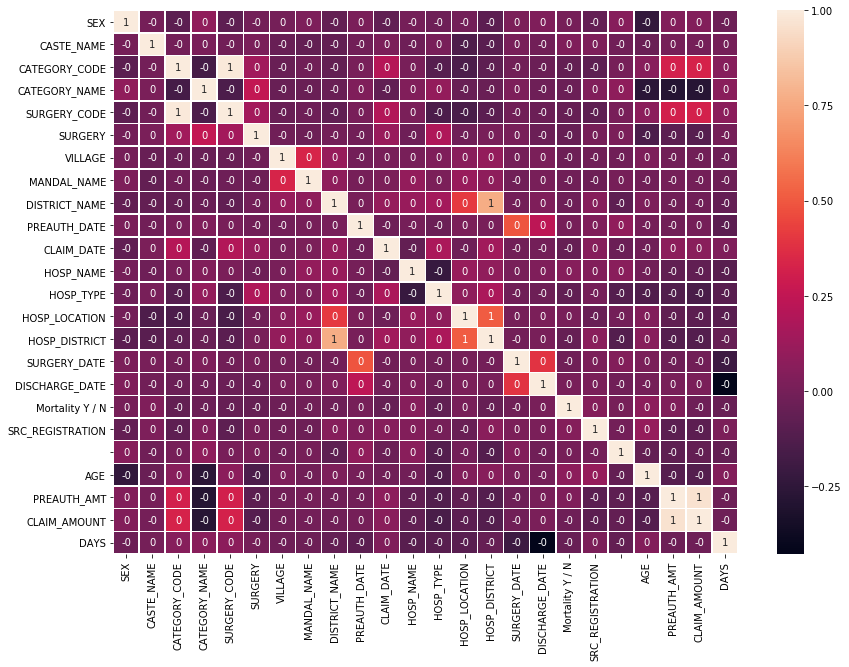

In [5]:
plt.figure(figsize=(14,10))
sb.heatmap(data_final.corr(),annot=True,linewidth=.5,fmt='.0f')

In [6]:
cor=data_final.corr()
cor_target=abs(cor["DAYS"])
relevant_features=cor_target[cor_target>0.3]
#relevant_featureS

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_final.drop('DAYS',1),data_final['DAYS'],test_size=.2,random_state=10)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature=SelectKBest(chi2,k=5).fit(X_train,y_train)

#print('Scorelist:',select_feature.scores_)
#print('Feature list:',X_train.columns)

 <h2 style='color:orange'align='center'>EXPLORATORY DATA ANALYSIS</h2>

# Represents CATEGORY_NAME AND SEX

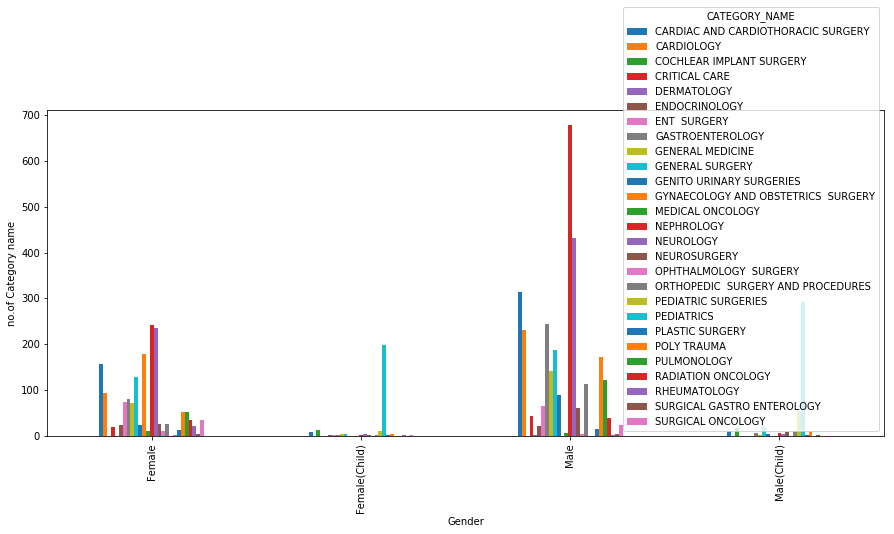

In [7]:

pd.crosstab(data.SEX,data.CATEGORY_NAME).plot(kind='bar',figsize=(15,6))
plt.xlabel('Gender')
plt.ylabel('no.of Category name')
plt.show()

# Represents total no of CATEGORY_NAMES.

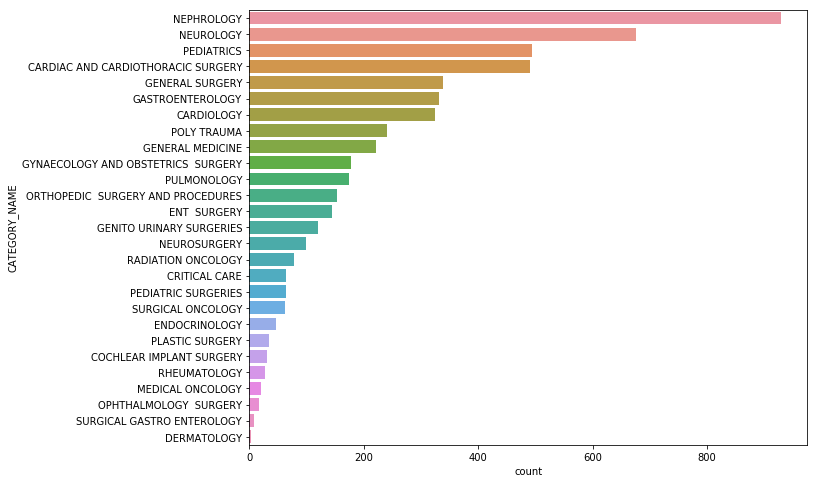

In [8]:

plt.figure(figsize=(10,8))
sb.countplot(y='CATEGORY_NAME',data=data,order=data['CATEGORY_NAME'].value_counts().index)

# Represents no.of CATEGORY_NAME based on DAYS.

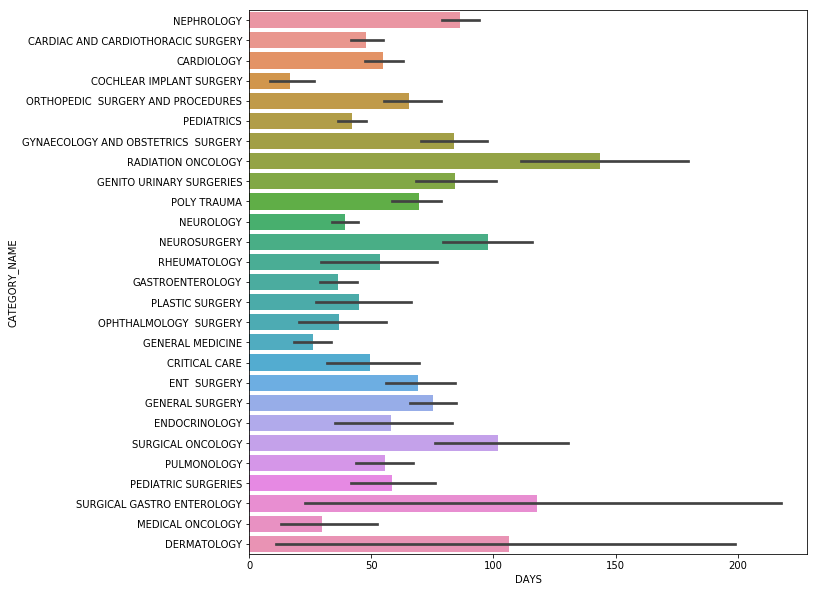

In [9]:
plt.figure(figsize=(10,10))
sb.barplot(y='CATEGORY_NAME',x='DAYS',data=data)

# Represents no.of CATEGORY_NAME based on SEX.

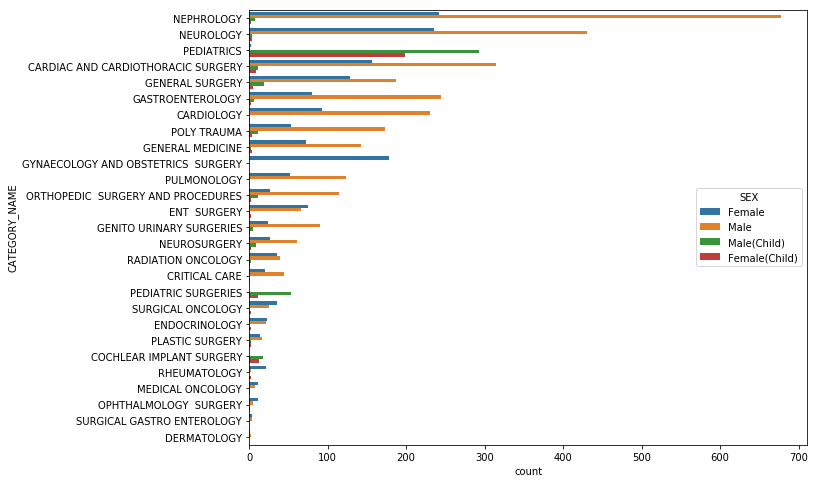

In [10]:
plt.figure(figsize=(10,8))
sb.countplot(y='CATEGORY_NAME',hue='SEX',data=data,order=data['CATEGORY_NAME'].value_counts().index)

# Represents total no.of SEX.

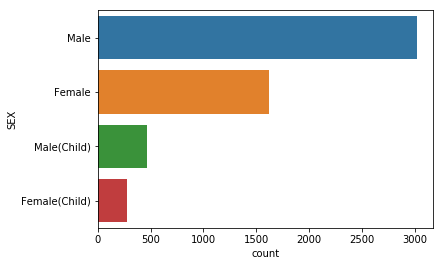

In [11]:
sb.countplot(y='SEX',data=data,order=data['SEX'].value_counts().index)

# Represents no.of DAYS based on HOSP_TYPE.

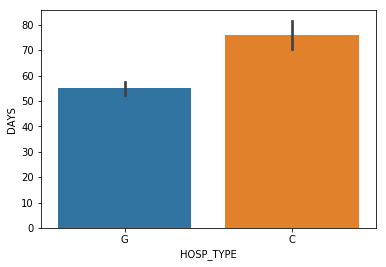

In [12]:
sb.barplot(x='HOSP_TYPE',y='DAYS',data=data)

# Represents no.of DAYS based on SEX.

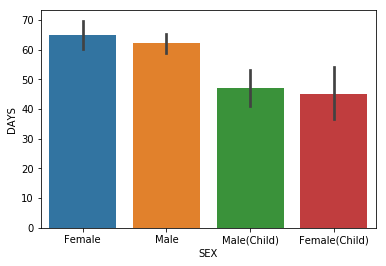

In [13]:
sb.barplot(x='SEX',y='DAYS',data=data)

In [14]:
x1=data_final[['SEX','CATEGORY_CODE', 'CATEGORY_NAME', 'SURGERY_CODE','SURGERY', 'PREAUTH_DATE','SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N','AGE', 'PREAUTH_AMT', 'CLAIM_AMOUNT']]

y1=data_final['DAYS']

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
#from xgboost import plot_importance
#model=XGBRegressor()

# Random forest regreesion

In [15]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

model.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# score

In [16]:
scr=model.score(x1_train,y1_train)*100
print('score is',scr)


score is 91.16870674097207


In [17]:
precict=model.predict(x1_test)
#y1_test.head()

#model.predict([[3,5,19,44,210,1356,56,370,0,0,35000,20000]])

health=pd.read_csv('shajahan.csv')

#health.head()

p=model.predict(health)

health['DAYS']=p

#health.head()

# INPUT LABELS

In [18]:
x1_test.head()

,SEX,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,PREAUTH_DATE,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,AGE,PREAUTH_AMT,CLAIM_AMOUNT
410,2,12,15,168,108,1778,164,345,0,55,26650,26650
5294,3,5,19,44,210,1356,56,370,0,0,35000,20000
2803,2,8,14,108,191,2332,207,331,0,76,20000,20000
3957,2,6,1,95,8,1847,220,76,0,48,91000,70000
4577,2,15,23,224,283,3286,306,182,0,51,65000,65000


# TARGETS

In [19]:
y1_test.head()

410      10
5294    110
2803      6
3957    170
4577     49
Name: DAYS, dtype: int64

# predicted days.

In [20]:
p=model.predict([[2,12,15,168,108,1773,164,345,0,55,26650,26650]])
print('PREDICT DISCHARGE DAYS:',p,'DAYS')

PREDICT DISCHARGE DAYS: [10.] DAYS


In [21]:
health.to_csv('predicted health Days')

#pwd